In [1]:
!pip install imutils


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [644]:
# import the necessary packages
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
from matplotlib import pyplot as plt
import numpy as np
# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {
	(1, 1, 1, 0, 1, 1, 1): 0,
	(0, 0, 1, 0, 0, 1, 0): 1,
	(1, 0, 1, 1, 1, 0, 1): 2,
	(1, 0, 1, 1, 0, 1, 1): 3,
	(0, 1, 1, 1, 0, 1, 0): 4,
	(1, 1, 0, 1, 0, 1, 1): 5,
	(1, 1, 0, 1, 1, 1, 1): 6,
	(1, 0, 1, 0, 0, 1, 0): 7,
	(1, 1, 1, 1, 1, 1, 1): 8,
	(1, 1, 1, 1, 0, 1, 1): 9
}

In [645]:
import cv2

import requests

url = 'http://192.168.137.197:8080/photoaf.jpg'
page = requests.get(url)

f_ext = '_myimg'
f_name = 'saved_photos/img{}.jpg'.format(f_ext)
with open(f_name, 'wb') as f:
    f.write(page.content)
    print("Image Accessed")

Image Accessed


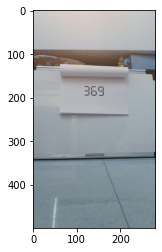

In [646]:
# load the example image
image = cv2.imread("saved_photos/img_myimg.jpg")
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
image = imutils.resize(image, height=500)
plt.imshow(image)

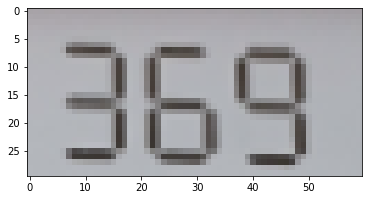

In [647]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

displayCnt=np.array([
       [111, 168],
       [111, 198],
       [171, 198],
       [171, 168]])
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))
plt.imshow(output)


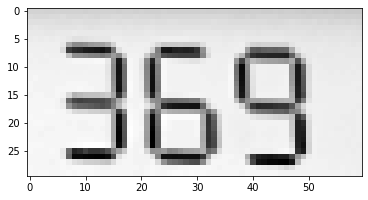

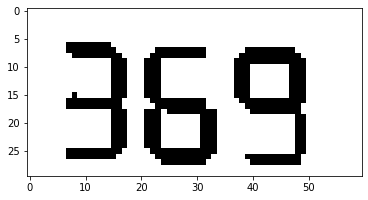

In [648]:

gray = warped
plt.imshow(gray, cmap="gray")
plt.show()

# median = cv2.medianBlur(warped, 3)
# # plt.imshow(output)
# adjusted = cv2.convertScaleAbs(gray, alpha=9, beta=20)

# median = cv2.medianBlur(adjusted, 9)
# plt.imshow(median, cmap="gray")
# plt.show()

# thresh_with_grey = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# plt.imshow(thresh_with_grey, cmap="gray")
# plt.show()

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
# thresh_with_grey = cv2.morphologyEx(thresh_with_grey, cv2.MORPH_OPEN, kernel)
# plt.imshow(thresh_with_grey)
# plt.show()


# gray = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# plt.imshow(gray, cmap="gray")
# plt.show()

(thresh, blackAndWhiteImage) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap="gray")
plt.show()

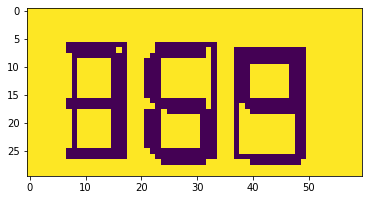

In [654]:
import numpy

contours = [numpy.array([[8,6],[8,26],[17,26], [17,6]], dtype=numpy.int32),numpy.array([[23,6],[23,26],[33,26], [33,6]], dtype=numpy.int32) ,numpy.array([[37,7],[37,26],[49,26],[49,7]], dtype=numpy.int32)]

drawing = blackAndWhiteImage.copy()
for cnt in contours:
    cv2.drawContours(drawing,[cnt],0,(0,255,0),1)

plt.imshow(drawing)
digitCnts=contours
thresh=blackAndWhiteImage

In [655]:
digits = []
len(digitCnts)

3

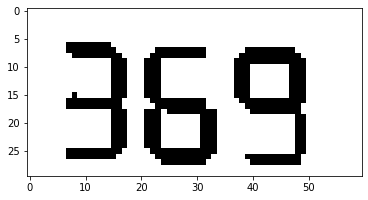

In [656]:
plt.imshow(thresh, cmap='gray')

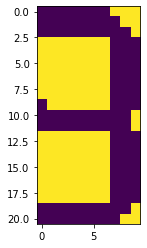

[1, 0, 1, 1, 0, 1, 1]
3


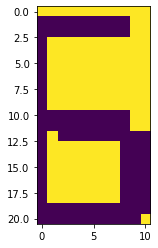

Checking again...
[1, 1, 0, 1, 1, 1, 1]
6


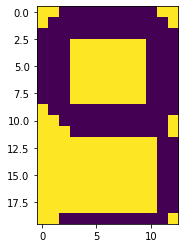

Checking again...
[1, 1, 1, 1, 0, 1, 1]
9


In [657]:
# loop over each of the digits
conf=3
for ci, c in enumerate(digitCnts):
    # extract the digit ROI
    (x, y, w, h) = cv2.boundingRect(c)
    roi = thresh[y:y + h, x:x + w]
    plt.imshow(roi)
    plt.show()
    # compute the width and height of each of the 7 segments
    # we are going to examine
    (roiH, roiW) = roi.shape
    (dW, dH) = (int(roiW * 0.15), int(roiH * 0.1))
    dHC = int(roiH * 0.05)
    # define the set of 7 segments
    segments = [
        ((0, 0), (w-dW, dH)),	# top
        ((0, dH), (dW, h // 2 - dHC)),	# top-left
        ((w - dW, 0), (w, h // 2)),	# top-right
        ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
        ((0, h // 2), (dW, h)),	# bottom-left
        ((w - dW, h // 2), (w, h)),	# bottom-right
        ((0, h - dH), (w, h))	# bottom
    ]
    on = [0] * len(segments)
    # loop over the segments
    for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
        # extract the segment ROI, count the total number of
        # thresholded pixels in the segment, and then compute
        # the area of the segment
        segROI = roi[yA:yB, xA:xB]
        total = cv2.countNonZero(segROI)
        area = (xB - xA) * (yB - yA)
#         print(area, total)
#         cnt1=[numpy.array([[xA,yA],[xA,yB],[xB,yB], [xB,yA]], dtype=numpy.int32)]
# #         print(cnt1)
#         drawing2=roi.copy()
#         cv2.drawContours(drawing2,cnt1,0,(0,255,0),1)
#         plt.imshow(drawing2)
#         plt.show()
        # if the total number of non-zero pixels is greater than
        # 50% of the area, mark the segment as "on"
        if 1- total / float(area) > 0.5:
            on[i]= 1
#             print("has a digit!")
#         print("===========Moving to next seggment===========")
    # lookup the digit and draw it on the image
    try:
        digit = DIGITS_LOOKUP[tuple(on)]
        digits.append(digit)
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
        cv2.putText(output, str(digit), (x + w -10 , y + h +2),
            cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)
        print(on)
        print(digit)
    except:
        conf-=1
        print("Checking again...")
        (roiH, roiW) = roi.shape
        (dW, dH) = (int(roiW * 0.2), int(roiH * 0.15))
        dHC = int(roiH * 0.05)
        # define the set of 7 segments
        segments = [
            ((0, 0), (w-dW, dH)),	# top
            ((0, dH), (dW, h // 2 - dHC)),	# top-left
            ((w - dW, 0), (w, h // 2)),	# top-right
            ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
            ((0, h // 2), (dW, h)),	# bottom-left
            ((w - dW, h // 2), (w, h)),	# bottom-right
            ((0, h - dH), (w, h))	# bottom
        ]
        for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
        # extract the segment ROI, count the total number of
        # thresholded pixels in the segment, and then compute
        # the area of the segment
            segROI = roi[yA:yB, xA:xB]
            total = cv2.countNonZero(segROI)
            area = (xB - xA) * (yB - yA)
            # if the total number of non-zero pixels is greater than
            # 30% of the area, mark the segment as "on"
            if 1-total / float(area) > 0.35:
                on[i]= 1
        print(on)
        try:
            digit = DIGITS_LOOKUP[tuple(on)]
            digits.append(digit)
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
            cv2.putText(output, str(digit),  (x + w -10 , y + h +2),
                cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)
            print(digit)
        except:
            if ci==0:
                digit=3
                conf-=1
                digits.append(digit)
                cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
                cv2.putText(output, str(digit),  (x + w -10 , y + h +2),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)
#                 print("print checck")
                print(digit)
            else:
                conf-=1
                print('No digit found')
#     break

1


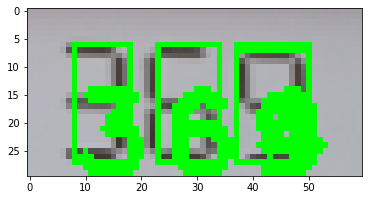

In [658]:
print(conf)
plt.imshow(output)

In [633]:
def returnDigits(name):
    image = cv2.imread(name)
    image = imutils.resize(image, height=500)
    plt.imshow(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    displayCnt=np.array([[200, 186],
           [200, 215],
           [250, 215],
           [250, 187]])
    warped = four_point_transform(gray, displayCnt.reshape(4, 2))
    output = four_point_transform(image, displayCnt.reshape(4, 2))
    plt.imshow(output)

    gray = warped
#     plt.imshow(gray, cmap="gray")
#     plt.show()

    (thresh, blackAndWhiteImage) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
#     plt.imshow(blackAndWhiteImage, cmap="gray")
#     plt.show()
    contours = [numpy.array([[8,5],[8,24],[16,24], [16,5]], dtype=numpy.int32),numpy.array([[21,5],[21,24],[30,24], [30,5]], dtype=numpy.int32) ,numpy.array([[35,5],[35,24],[45,24],[45,5]], dtype=numpy.int32)]

#     drawing = blackAndWhiteImage.copy()
#     for cnt in contours:
#         cv2.drawContours(drawing,[cnt],0,(0,255,0),1)

#     plt.imshow(drawing)
    digitCnts=contours
    thresh=blackAndWhiteImage
    digits = []
    # loop over each of the digits
    for c in digitCnts:
        # extract the digit ROI
        (x, y, w, h) = cv2.boundingRect(c)
        roi = thresh[y:y + h, x:x + w]
#         plt.imshow(roi)
#         plt.show()
        # compute the width and height of each of the 7 segments
        # we are going to examine
        (roiH, roiW) = roi.shape
        (dW, dH) = (int(roiW * 0.15), int(roiH * 0.1))
        dHC = int(roiH * 0.05)
        # define the set of 7 segments
        segments = [
            ((0, 0), (w-dW, dH)),	# top
            ((0, dH), (dW, h // 2 - dHC)),	# top-left
            ((w - dW, 0), (w, h // 2)),	# top-right
            ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
            ((0, h // 2), (dW, h)),	# bottom-left
            ((w - dW, h // 2), (w, h)),	# bottom-right
            ((0, h - dH), (w, h))	# bottom
        ]
        on = [0] * len(segments)
        # loop over the segments
        for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
            # extract the segment ROI, count the total number of
            # thresholded pixels in the segment, and then compute
            # the area of the segment
            segROI = roi[yA:yB, xA:xB]
            total = cv2.countNonZero(segROI)
            area = (xB - xA) * (yB - yA)
    #         print(area, total)
    #         cnt1=[numpy.array([[xA,yA],[xA,yB],[xB,yB], [xB,yA]], dtype=numpy.int32)]
    # #         print(cnt1)
    #         drawing2=roi.copy()
    #         cv2.drawContours(drawing2,cnt1,0,(0,255,0),1)
    #         plt.imshow(drawing2)
    #         plt.show()
            # if the total number of non-zero pixels is greater than
            # 50% of the area, mark the segment as "on"
            if 1- total / float(area) > 0.5:
                on[i]= 1
    #             print("has a digit!")
    #         print("===========Moving to next seggment===========")
        # lookup the digit and draw it on the image
        try:
            digit = DIGITS_LOOKUP[tuple(on)]
            digits.append(digit)
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
            cv2.putText(output, str(digit), (x + w -10 , y + h +2),
                cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)
#             print(on)
#             print(digit)
        except:
#             print("Checking again...")
            for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
            # extract the segment ROI, count the total number of
            # thresholded pixels in the segment, and then compute
            # the area of the segment
                segROI = roi[yA:yB, xA:xB]
                total = cv2.countNonZero(segROI)
                area = (xB - xA) * (yB - yA)
                # if the total number of non-zero pixels is greater than
                # 30% of the area, mark the segment as "on"
                if 1-total / float(area) > 0.4:
                    on[i]= 1
#             print(on)
            try:
                digit = DIGITS_LOOKUP[tuple(on)]
                digits.append(digit)
                cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
                cv2.putText(output, str(digit),  (x + w -10 , y + h +2),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)
#                 print(digit)
            except:
                print('No digit found')
    return digits

[3, 7, 5]

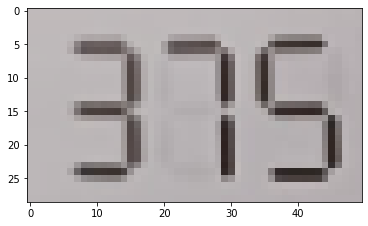

In [49]:
returnDigits('375.jpg')